In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [2]:
#Histogram function
def Histogram(img):
    levels=[]
    for x in range(256):
        levels.append(x)
    width,height=img.size
    counts=[]
    #for each intensity value
    for i in levels:
        temp=0
        for x in range(width):
          for y in range(height):
            if (img.getpixel((x,y))==i):
              temp=temp+1
        counts.append(temp)
    return counts

In [3]:
def weight(A,n):
    wt=sum(A)/n
    return wt

In [5]:
def mean(A):
    mu=0
    for i in range(len(A)):
        mu+=i*A[i]
    if sum(A)==0:
        return 0
    return mu/sum(A)

In [6]:
def mean2(A):
    mu=0
    for i in range(len(A)):
        mu+=i*A[i]
    return mu

In [7]:
def var(A,mu):
    var=0
    for i in range(len(A)):
        var+=((i-mu)**2)*A[i]
    if sum(A)==0:
        return 0   
    return var/sum(A)

In [8]:
def otsu_within(hist):
    within_var=0
    for i in range(len(hist)):
        threshold=i
#         print(threshold)
        if threshold==0:
            A=hist[:threshold+1]
            B=hist[threshold+1:]
            wt_A=weight(A,sum(hist))
            wt_B=weight(B,sum(hist))
#             print(wt_A,wt_B)
            mean_A=mean(A)
            mean_B=mean(B)
#             print(mean_A,mean_B)
            var_A=var(A,mean_A)
            var_B=var(B,mean_B)
#             print(var_A,var_B)
            within_var=wt_A*var_A+wt_B*var_B
            within_var_min=within_var
#             print(within_var_min)
            otsu_thres=threshold
#             print(otsu_thres)
            
        else:
            A=hist[:threshold+1]
            B=hist[threshold+1:]
            wt_A=weight(A,sum(hist))
            wt_B=weight(B,sum(hist))
            mean_A=mean(A)
            mean_B=mean(B)
            var_A=var(A,mean_A)
            var_B=var(B,mean_B)
            within_var=wt_A*var_A+wt_B*var_B
            if within_var < within_var_min:
                otsu_thres=threshold
                within_var_min=within_var
#             print(within_var_min)
#             print(within_var)
#             print(otsu_thres)
    return otsu_thres

In [9]:
def otsu_bet(hist):
    for i in range(len(hist)):
        threshold=i
        if threshold==0:
            A=hist[:threshold+1]
            B=hist[threshold+1:]
            wt_A=weight(A,sum(hist))
            wt_B=weight(B,sum(hist))
            mean_A=mean2(A)/wt_A if wt_A!=0 else 0
            mean_B=(mean2(hist)-mean2(A))/wt_B if wt_B!=0 else 0
#             var_A=var(A,mean_A)
#             var_B=var(B,mean_B)
            bet_var=wt_A*wt_B*(mean_A-mean_B)*(mean_A-mean_B)
            bet_var_max=bet_var
            otsu_thres=threshold
        else:
            A=hist[:threshold+1]
            B=hist[threshold+1:]
            wt_A=weight(A,sum(hist))
            wt_B=weight(B,sum(hist))
            mean_A=mean2(A)/wt_A if wt_A!=0 else 0
            mean_B=(mean2(hist)-mean2(A))/wt_B if wt_B!=0 else 0
#             var_A=var(A,mean_A)
#             var_B=var(B,mean_B)
            bet_var=wt_A*wt_B*(mean_A-mean_B)*(mean_A-mean_B)
            if bet_var > bet_var_max:
                otsu_thres=threshold
                bet_var_max=bet_var
    return otsu_thres

In [10]:
#Image binarization function
def binarize_img(img, thres):
    row, col = img.size
#     bin_image = np.array(img)#np.zeros((row, col))
    bin_image = np.zeros((col,row))
    for i in range(0,row):
        for j in range(0,col):
            if img.getpixel((i,j)) >= thres:
                bin_image[j,i] = 1
            else:
                bin_image[j,i] = 0
    return bin_image

In [11]:
#Read image
img = Image.open('coins.png')
#Histogram
hist_img=Histogram(img)
otsu_thres1=otsu_within(hist_img)
print(otsu_thres1)

125


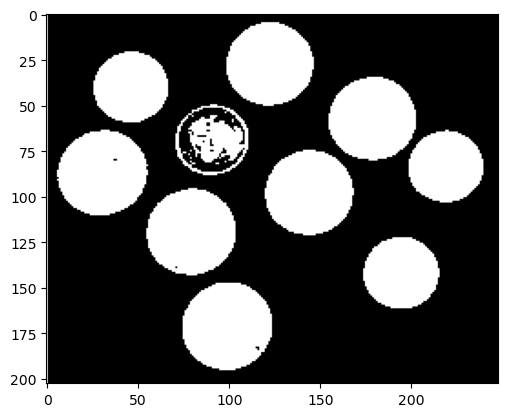

In [12]:
binary_image=binarize_img(img,otsu_thres1)
binary_image
plt.imshow(binary_image,cmap = 'gray')


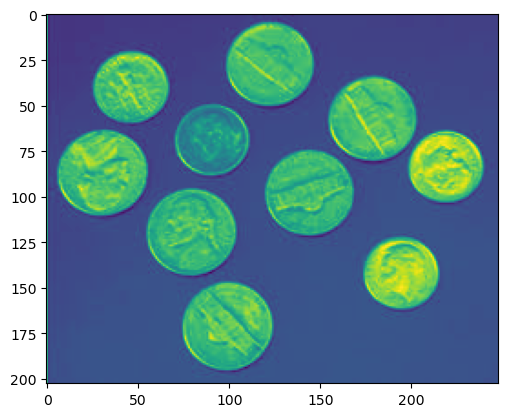

In [13]:
plt.imshow(img)

In [14]:
otsu_thres2=otsu_bet(hist_img)
print(otsu_thres2)

125


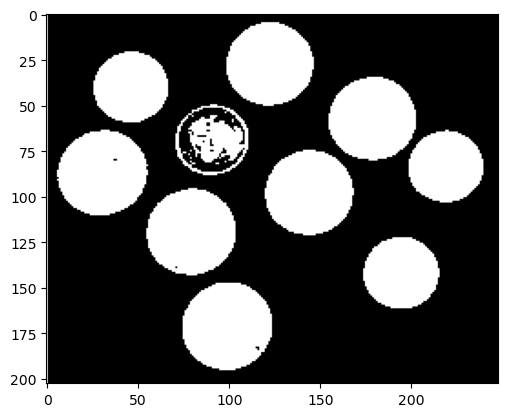

In [15]:
binary_image=binarize_img(img,otsu_thres2)
binary_image
plt.imshow(binary_image, cmap = 'gray')

In [32]:
t_0 = timeit.default_timer()
# call function
res = otsu_within(hist_img)
# record end time
t_1 = timeit.default_timer()
 
# calculate elapsed time and print
elapsed_time = round((t_1 - t_0) * 10 ** 6, 3)
print(f"Elapsed time: {elapsed_time} µs")

Elapsed time: 25592.063 µs


In [33]:
t_0 = timeit.default_timer()
# call function
res = otsu_bet(hist_img)
# record end time
t_1 = timeit.default_timer()
 
# calculate elapsed time and print
elapsed_time = round((t_1 - t_0) * 10 ** 6, 3)
print(f"Elapsed time: {elapsed_time} µs")

Elapsed time: 8255.769 µs
